[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1oQIwnWvy_xWOH8aWakMH421bcxpRgmuK?usp=sharing)


#**Q1**.

*Go through the tutorial on Network elements. Implement functions for Exercises 1 -- 3.*

## Exercise 1

*Write a function named get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.*

## Answers

In [ ]:
import networkx as nx
%matplotlib inline

In [ ]:
def get_leaves(G):
  leaves=[]                         # Create an empty list to store the leaves
  for node in G.nodes():            # Looping through nodes
    if G.degree(node)==1:           # if degree of the node is 1, add it the empty list
      leaves.append(node)

  return leaves


['a', 'b', 'd', 'c']
success! :)


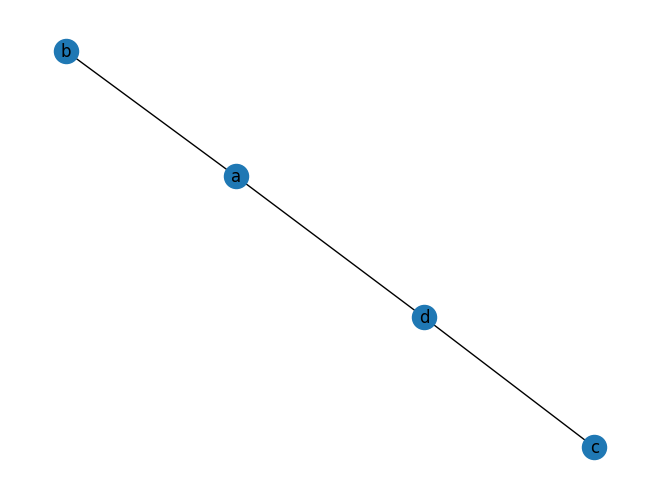

In [ ]:
# Create a graph with labels a, b, c, d and connect the edges
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

print(G.nodes())
nx.draw(G, with_labels=True)

# Implement the get_leaves funcction to list the nodes that has degree 1
assert set(get_leaves(G)) == {'c', 'b'}, 'failed :('
print('success! :)')

# Exercise 2

*Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.*

## Answers

In [ ]:
# define a function named as max_degree.
def max_degree(G):
  max_degree = None
  for n in G.nodes():
    current_degree = G.degree(n)
    if max_degree is None or current_degree > max_degree[1]:
      max_degree = (n, current_degree)

  return max_degree


In [ ]:
# I have used the github link to directly download the file, so that we need not to upload to colab and anyone with access to the notebook can run the codes smoothly.
!wget https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/friends.adjlist -O /content/friends.adjlist

--2024-02-15 18:15:16--  https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/friends.adjlist
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109 [text/plain]
Saving to: ‘/content/friends.adjlist’

/content/friends.ad 100%[===================>]     109  --.-KB/s    in 0s      

2024-02-15 18:15:16 (13.7 MB/s) - ‘/content/friends.adjlist’ saved [109/109]



In [ ]:
#!ls
#!pwd
!ls /content/friends.adjlist

/content/friends.adjlist


In [ ]:
SG = nx.read_adjlist('/content/friends.adjlist')
assert max_degree(SG) == ('Claire', 4), 'failed :('
print('success! :)')

success! :)


## Discussions
* Define a function named as max_degree
* Logic used = First define a empty tuple. Then  write a loop to find the degree of a node.
* Then If the current degree is larger than the previous degree, add it to the tuple.
* Here we have used the [`friends.adjlist`](https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/friends.adjlist) that is available openly. And i have used wget method to download the file.

## Exercise 3

*Write a function mutual_friends that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph SG drawn above,*

## Answers

In [ ]:
def mutual_friends(G, node_1, node_2):
  common_nodes=[]
  friends_1=set(G.neighbors(node_1))  # set stores only unique elements
  friends_2=set(G.neighbors(node_2))
  print(friends_1)
  for i in friends_1:
    for j in friends_2:
      if i == j:
        common_nodes.append(i)
  return common_nodes

In [ ]:
SG = nx.read_adjlist('friends.adjlist')
assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank'], 'failed :('
assert mutual_friends(SG, 'George', 'Bob') == [], 'failed :('
assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank'], 'failed :('
print('success! :)')

{'Claire', 'Frank', 'Bob'}
{'Frank', 'Dennis'}
{'Esther', 'Alice', 'Frank', 'Dennis'}
success! :)


## Discussions
* In the exercise-3, we have defined a function which will gives us the mutual friends that a node have in a social network.
* Here also we use the same friends.adjlist file that we used in exercise 2.
* To find the mutual friends, we have implemented the "neighbors" function of Networkx module.

# **Q2**.

*Consider this adjacency matrix.*

![\label{fig:adjacency_matrix}](https://raw.githubusercontent.com/anwala/teaching-network-science/main/spring-2023/homework/hw1/adj_mat.png)

*An entry in the ith row and jth column indicates the weight of the link from node i to node j. For instance, the entry in the second row and third column is 2, meaning the weight of the link from node B to node C is 2. What kind of network does this matrix represent?*

*Why?*

##Answers





The matrix is directed and weighted.

_**Reason**_

* As the adjacency matrix is not symmetric , so the network is directed. If it's symmetric, the network will be undirected.

* The adjacency matrix also contains values than 0 and 1, hence it is weighted.

#**Q3**.

*Consider the simple (undirected) network represented by the following graph:*

![\label{fig:network}](https://raw.githubusercontent.com/anwala/teaching-network-analysis/main/spring-2024/homework/hw1/hw1_plot.png)

**a.**  Show the degree of each node and make a plot of its (normalized) degree distribution.

**b.**   Calculate by hand: the diameter and the average path length of the network.

**c.**  Calculate by hand: the local clustering coefficient of each node and the average local clustering coefficient of the entire network.

## Answers

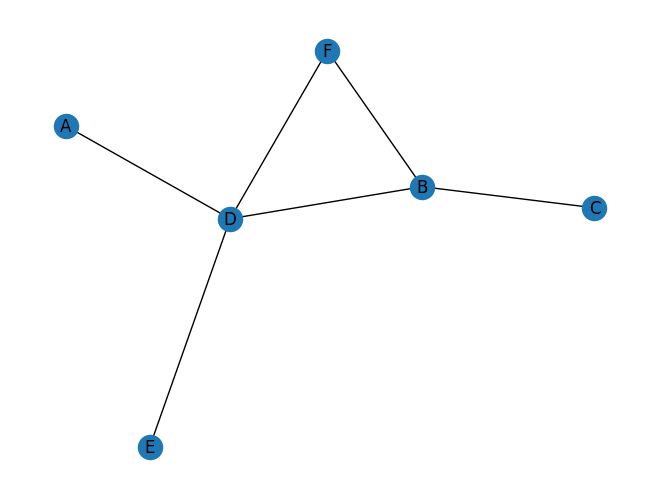

In [ ]:
# Let generate a graph replicating the above example.
import networkx as nx
%matplotlib inline
G = nx.Graph()
nodes_to_add = ['A','B','C','D','E','F']
G.add_nodes_from(nodes_to_add)
edges_to_add = [('A', 'D'), ('D', 'E'), ('D', 'B'),('D','F'),('B','F'),('B','C')]
G.add_edges_from(edges_to_add)

# print(G.nodes())
nx.draw(G, with_labels=True)

In [ ]:
### Show the degree of each node.
print(G.nodes())
degree=[]
for node in G.nodes():
  deg = (node, G.degree(node))
  degree.append(deg)
  print(f"The node {node} has degree {G.degree(node)}: {deg}")

['A', 'B', 'C', 'D', 'E', 'F']
The node A has degree 1: ('A', 1)
The node B has degree 3: ('B', 3)
The node C has degree 1: ('C', 1)
The node D has degree 4: ('D', 4)
The node E has degree 1: ('E', 1)
The node F has degree 2: ('F', 2)


In [ ]:
### Here, I have written code to find the no. of nodes that has degree k.
degrees = [degree for node, degree in G.degree(G.nodes())]
print(degrees)
Nodes_with_degree_k=[]
for k in set(degrees):     #set helps to check only for the unique element
  #print(f"k: {k}")
  nodes=[]
  for node in G.nodes():
    if G.degree(node) == k:
      n = node
      #print(f"n:{n}")
      nodes.append(n)
  deg_k=(k,len(nodes))
  Nodes_with_degree_k.append(deg_k)

print(f"No. of nodes with degree k: {Nodes_with_degree_k}")
N_k=[]
for degree, node in Nodes_with_degree_k:
  N_k.append(node)
  print(f"{node} nodes have degree {degree}.")
print(f"N_k:{N_k}")

[1, 3, 1, 4, 1, 2]
No. of nodes with degree k: [(1, 3), (2, 1), (3, 1), (4, 1)]
3 nodes have degree 1.
1 nodes have degree 2.
1 nodes have degree 3.
1 nodes have degree 4.
N_k:[3, 1, 1, 1]


P_k:[0.5, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


Text(0.5, 1.0, 'Normalized degree distribution')

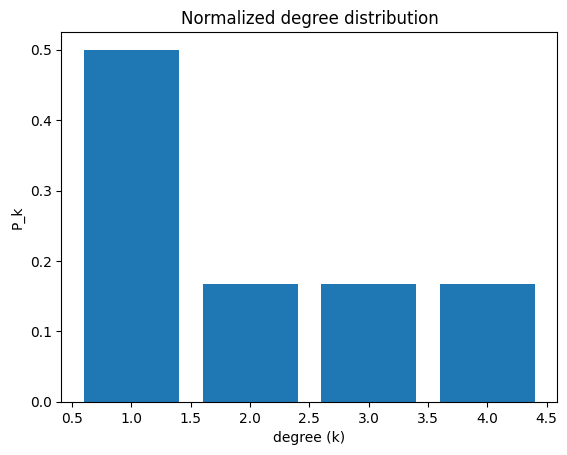

In [ ]:
import matplotlib.pyplot as plt

### Plot the normalized degree distribution.
### Normalized degree distribution = N_k / N
### where N_k = no. of nodes with degree k
### and N = total no. of nodes
### Now we will plot the histogram
N = len(G.nodes())
P_k= []
for i in N_k:
  P = i / N
  P_k.append(P)

print(f"P_k:{P_k}")
k=[1,2,3,4]
plt.bar(k, P_k)
plt.xlabel("degree (k)")
plt.ylabel("P_k")
plt.title("Normalized degree distribution")

##b.

*Calculate by hand: the diameter and the average path length of the network*

## _Answers_
i) Diameter of a network is the shortest distance between the two most distant nodes in the network. In our case, two farthest nodes are A to C or vice-versa.

The shortest possible path from A to C is:

A-->D-->B-->C = 3 (counting the edges)

Therefore, the diameter is 3.

ii) Average path length

  The average path length (APL) is the average of the shortest path lengths across all pairs of nodes.

|Pair|Shortest Path|Shortest path length|
|:---|:---|:---|
|A, B|A-->D-->B|2|
|A, C|A-->D-->B-->C|3|
|A, D|A-->D|1|
|A, E|A-->D-->E|2|
|A, F|A-->D-->F|2|
|B, C|B-->C|1|
|B, D|B-->D|1|
|B, E|B-->D-->E|2|
|B, F|B-->F|1|
|C, D|C-->B-->D|2|
|C, E|C-->B-->D-->E|3|
|C, F|C-->B-->F|2|
|D, E|D-->E|1|
|D, F|D-->F|1|
|E, F|E-->D-->F|2|
||**Total**|26|

So, sum of shortest path = 26

Here the network is undirected network. So,
total no. of pairs in the given network is, given by the following formula, $$
\frac{N(N-1)}{2}
$$
where, N = total no. of nodes = 6

So, total no. of pairs = 15

Therefore, Average path length = sum of shortest paths/ total no. of pairs

=> APL = 26 / 15
=> APL = 1.73





##**C**.
*Calculate by hand: the local clustering coefficient of each node and the average local clustering coefficient of the entire network.*

## Answers ##

Clustering coefficient refers to the ratio of the actual number of links among the nodes to the maximum number of links in the neighborhood of a node.

Local clustering coefficient for node *i* is given by,
$$
C(i)=\frac{2*N(i)}{k_i(k_i-1)}
$$
Where, $N(i)$= no. of links between neighbors of node *i*, and
 $k_i$ = degree of node *i*

**Note**
If degree is less than 2, then clustering coefficient is zero.

|node($i$)|neighboring nodes|degree($K_i$)|N(i)|Local Clustering coefficient($C(i)$)|
|:---|:---|:---|:---|:---|
|A|D, E|1|1|0 or undefined|
|B|C, D, F|3|1|(2.1)/3.(3-1) = 1/3|
|C|B|1|0|0 or undefined|
|D|A, B, E, F|4|1|(2.1)/4.(4-1) = 1/6|
|E|D|1|0|0 or undefined|
|F|D, B|2|1|(2.1)/2.(2-1)=1|

Therefore, the average clustering coefficient is;
$$
C(i)=\frac{\frac{1}{3} + \frac{1}{6} + 1 + 0 + 0+ 0}{6} = 0.249
$$




##**Q4**.

*Consider the network defined by the adjacency matrix in Q2. How many nodes are in this network? How many links? Are there any self-loops?*

## Answers

* There are 6 nodes in the network.
* There are no self loops.

## Discussions

* We know,

 No. of nodes = no. of rows or columns in the adjacency matrix
  - As there are 6 rows and also 6 columns in the given adjacency matrix, the no. of nodes that network has 6.

* The diagonal elements are zero in the given adjacency matrix, hence it is concluded that there are no self loops.

**NOTE** : The adjacency matrix is a square matrix. Thus, no. of rows is always equal to no. of columns.



#**Q5**.

*Webflix keeps data on customer preferences using a bipartite network connecting users to movies they have watched and/or rated. Webflix's movie library contains approximately 1,000 movies. In the fourth quarter of 2022, Webflix reported having about 5,000 users. Also, on average, a user has watched and/or rated 750 movies. Approximately how many links are in this network? Would you consider this network sparse or dense? Explain.*

## Answers

i) The bipartile network has two groups of nodes such as users and movies.

No. of users $\approx$ 5000

No. of movies $\approx$ 1000

No. of movies a user has watched $\approx$ 750

Therefore, approximately there would be 5000 * 750 = 3,750,000 links in the network.

ii) The network seems to be dense, because each user is connected to more than 2/3 of the total movies which means the average degree distribution is high. Density is related to degree distribution. The higher the degree distribution, the denser the network is.


## References

1) Networkx documentation 3.2.1, <https://networkx.org/documentation/stable/reference/index.html>

2) Bipartite Networks, <https://miat.inrae.fr/site/images/3/3b/Donnet.pdf>